In [5]:
#background lith-ion power is the largest producer of electric vechicle batteries
#they provide batteries on rent to e-vehicle drive.
#Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company
#Lith-ion power has a varaible pricing model based on the driver's driving history.
#Battery life depends on factors such as over speeding, distance driven per day etc.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)

In [2]:
#read in data
dataset = pd.read_csv('../../../ai_algos/data/driver-data.csv')
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
#check for missing data and data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [8]:
#drop id as it's not needed
dataset.drop('id',axis=1,inplace=True)

#check count, mean and standard deviation for each column 
dataset.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [9]:
#initiate kmeans with minimum number of clusters needed
kmeans = KMeans(n_clusters =2)

#fit the mdoel
kmeans.fit(dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
#view information over clusters that have been created
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(len(kmeans.labels_))

[[180.017075    18.29      ]
 [ 50.04763437   8.82875   ]]
[1 1 1 ... 0 0 0]
4000


In [13]:
#Check how many unique drivers there are inthe first and second cluster
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


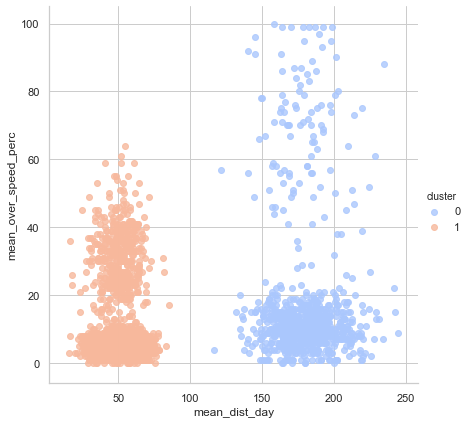

In [14]:
#
dataset["cluster"] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=dataset,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [17]:
#try a different number of clusters 

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(dataset.drop('cluster',axis=1))
print(kmeans4.cluster_centers_)
unique,counts = np.unique(kmeans4.labels_,return_counts=True)
print(dict(zip(unique,counts)))

[[ 50.43591549  32.39671362]
 [180.34311782  10.52011494]
 [ 49.98800649   5.20944484]
 [177.83509615  70.28846154]]
{0: 426, 1: 696, 2: 2774, 3: 104}


C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


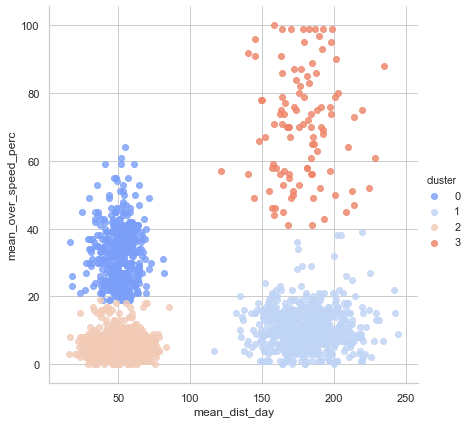

In [18]:
dataset["cluster"] = kmeans4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=dataset,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)